In [ ]:

import kagglehub
brendan45774_test_file_path = kagglehub.dataset_download('brendan45774/test-file')

print('Data source import complete.')


Data source import complete.


In [ ]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/test-file/tested.csv


<div style="
    border: 4px solid #FFD700;
    background-color: #133960;
    color: white;
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;">

 📊 Note :: Kindly upvote my notebook its great motivation for me and will be helpful for other to find easily my note book Bundle of Thanks
</div>


<div style="
    border: 4px solid #FFD700;
    background-color: #133960;
    color: white;
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;">
    
 📊 Importing library
</div>


In [ ]:
import  matplotlib.pyplot  as plt
from  sklearn.model_selection  import train_test_split
from  sklearn.preprocessing    import StandardScaler,OneHotEncoder
from sklearn.pipeline          import Pipeline
from  sklearn.compose          import ColumnTransformer
from  sklearn.metrics          import   accuracy_score
from  sklearn.linear_model    import LinearRegression,LogisticRegression
from  sklearn.ensemble          import RandomForestClassifier

<div style="
    border: 4px solid #FFD700;
    background-color: #133960;
    color: white;
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;">
    
 📊 load and preprocess the data
</div>


In [ ]:
url   = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df  = pd.read_csv(url)

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df[['Fare',"Pclass"	,"Sex"  ,'SibSp', "Parch","Age","Embarked","Survived"]]#  main feature



df['Age']=   df["Age"].replace(0,np.nan).fillna(df['Age'].mean())



In [ ]:
df.duplicated().sum()

np.int64(111)

In [ ]:
df.drop_duplicates()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived
0,7.2500,3,male,1,0,22.000000,S,0
1,71.2833,1,female,1,0,38.000000,C,1
2,7.9250,3,female,0,0,26.000000,S,1
3,53.1000,1,female,1,0,35.000000,S,1
4,8.0500,3,male,0,0,35.000000,S,0
...,...,...,...,...,...,...,...,...
885,29.1250,3,female,0,5,39.000000,Q,0
887,30.0000,1,female,0,0,19.000000,S,1
888,23.4500,3,female,1,2,29.699118,S,0
889,30.0000,1,male,0,0,26.000000,C,1


In [ ]:
df['Age']=   df["Age"].replace(0,np.nan).fillna(df['Age'].mean())

In [ ]:
df["Age"]  = df['Age'].astype(int)


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Fare,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Age,0
Embarked,0
Survived,0


In [ ]:
df.dtypes

,0
Fare,float64
Pclass,int64
Sex,object
SibSp,int64
Parch,int64
Age,int64
Embarked,object
Survived,int64


In [ ]:
df.head()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived
0,7.2500,3,male,1,0,22,S,0
1,71.2833,1,female,1,0,38,C,1
2,7.9250,3,female,0,0,26,S,1
3,53.1000,1,female,1,0,35,S,1
4,8.0500,3,male,0,0,35,S,0


<div style="
    border: 4px solid #FFD700;
    background-color: #133960;
    color: white;
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;">
    
 📊 feature engineering
</div>



df['Sex']=df['Sex'].map({'male': 0  , 'female' : 1})

df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2
bins  = [0,12,18,60,120]
labels =  ["child", "teen","adults","senior_adults"]
df['Age_group'] =  pd.cut(df['Age'] , bins=bins, labels=labels)
df['Age_group'] =  df['Age_group'].map({'child':0,'teen':1 ,'adults':2,'senior_adults':3})

df['family_size'] = df['Parch'] +  df["SibSp"]+1 #1for passenger themself

In [ ]:

df.head()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived,Age_group,family_size
0,7.2500,3,0,1,0,22,2,0,2,2
1,71.2833,1,1,1,0,38,0,1,2,2
2,7.9250,3,1,0,0,26,2,1,2,1
3,53.1000,1,1,1,0,35,2,1,2,2
4,8.0500,3,0,0,0,35,2,0,2,1


In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]


column_name = 'Fare'

# Apply the function
cleaned_df = remove_outliers_iqr(df, column_name)


cleaned_df.head()

,Fare,Pclass,Sex,SibSp,Parch,Age,Embarked,Survived,Age_group,family_size
0,7.2500,3,0,1,0,22,2,0,2,2
2,7.9250,3,1,0,0,26,2,1,2,1
3,53.1000,1,1,1,0,35,2,1,2,2
4,8.0500,3,0,0,0,35,2,0,2,1
5,8.4583,3,0,0,0,29,1,0,2,1


In [ ]:
def remove_out_iqr(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR  =  q3 - q1
    lower_bound = q1 - 1.5 *IQR
    upper_bound =q3 +1.5 * IQR
    return data[(data[column]>lower_bound) & (data[column]  < upper_bound)]


col = 'Fare'

cleand_data=remove_out_iqr(df,col)

<div style="
    border: 4px solid #FFD700;
    background-color: #133960;
    color: white;
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;">
    
 📊 Handling outlier
</div>


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


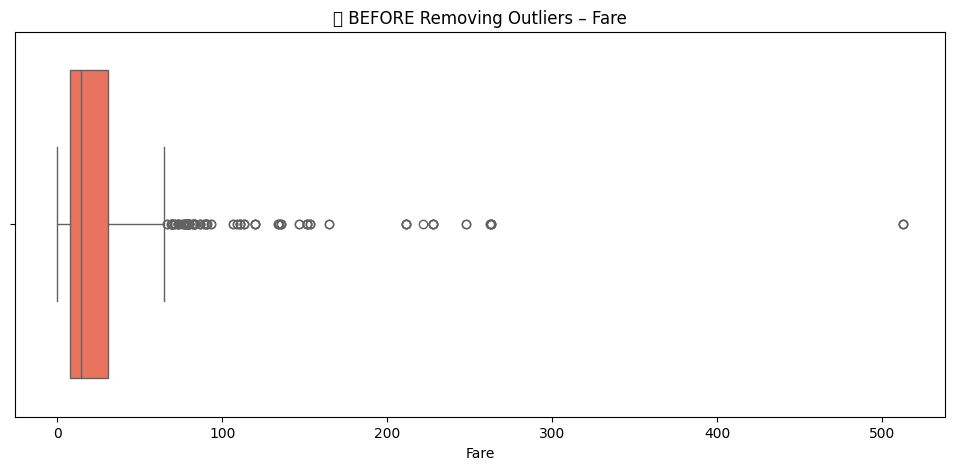

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


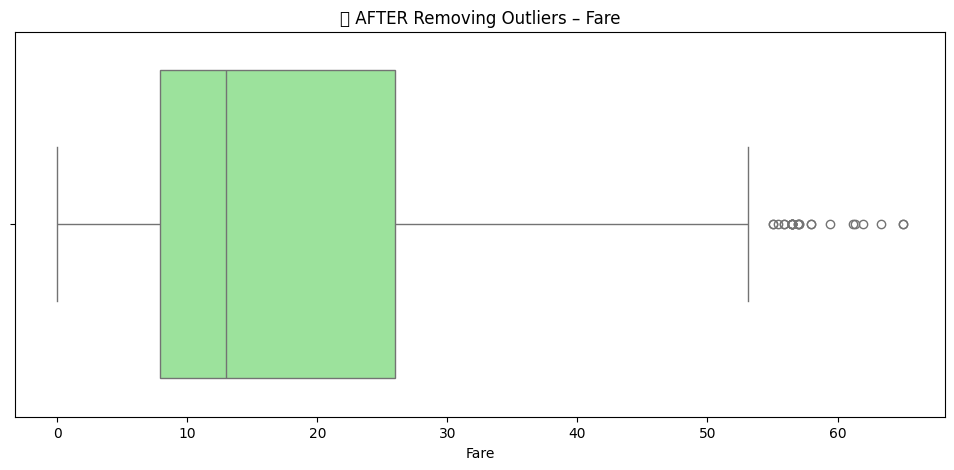

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


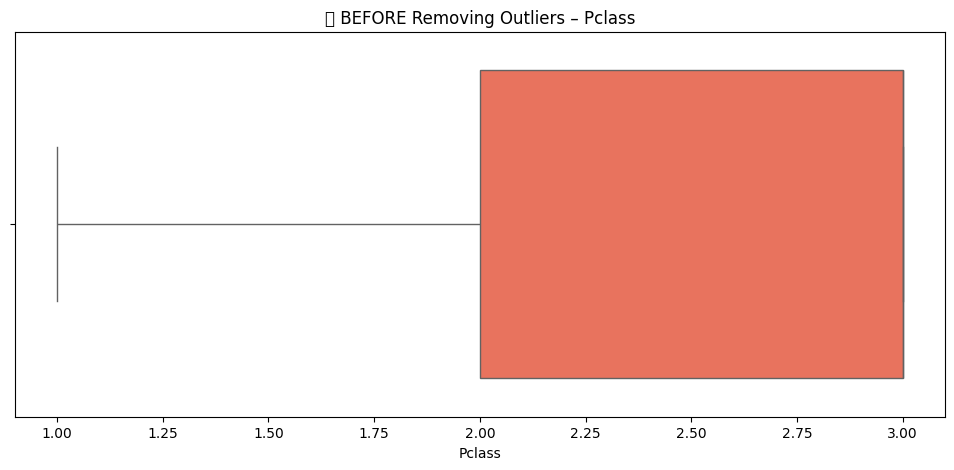

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


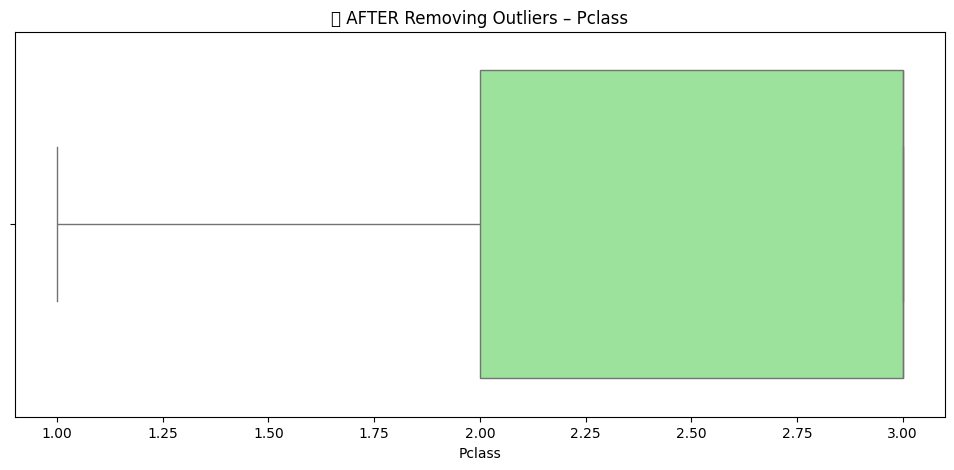

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


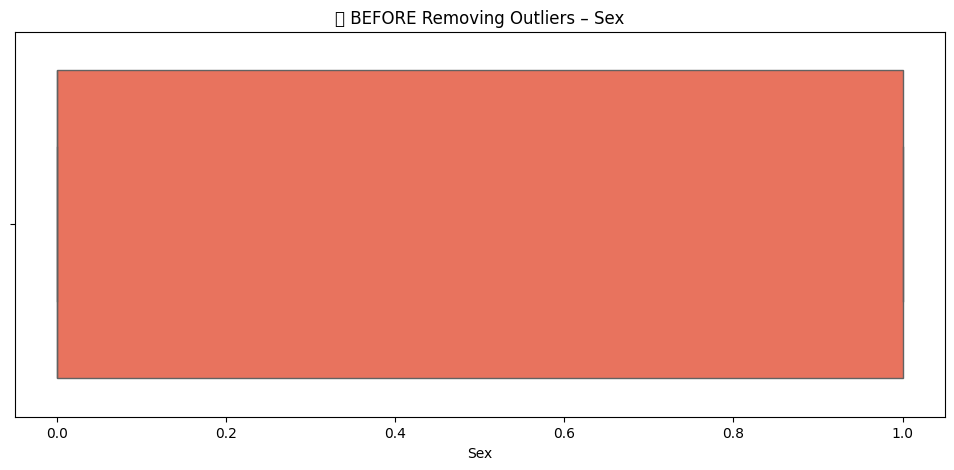

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


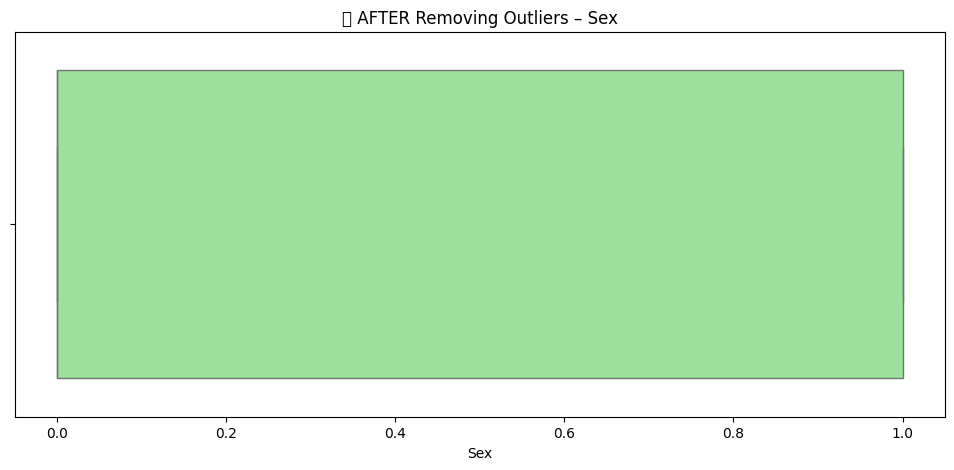

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


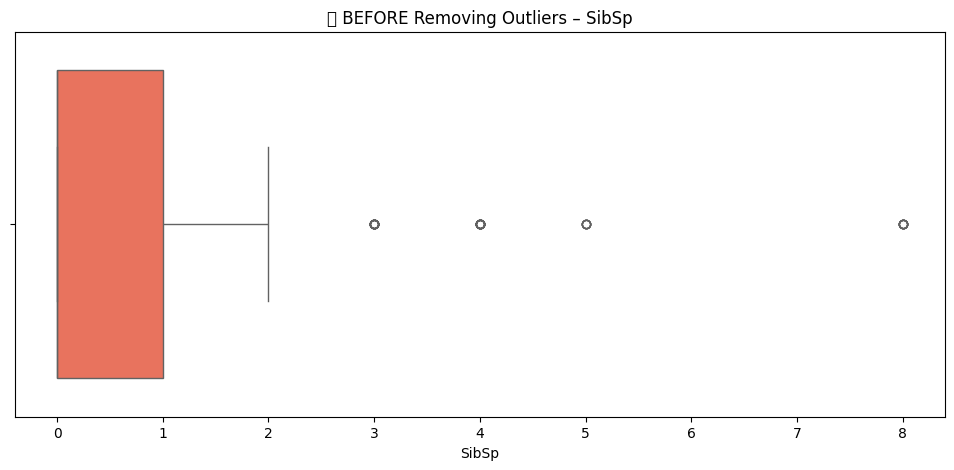

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


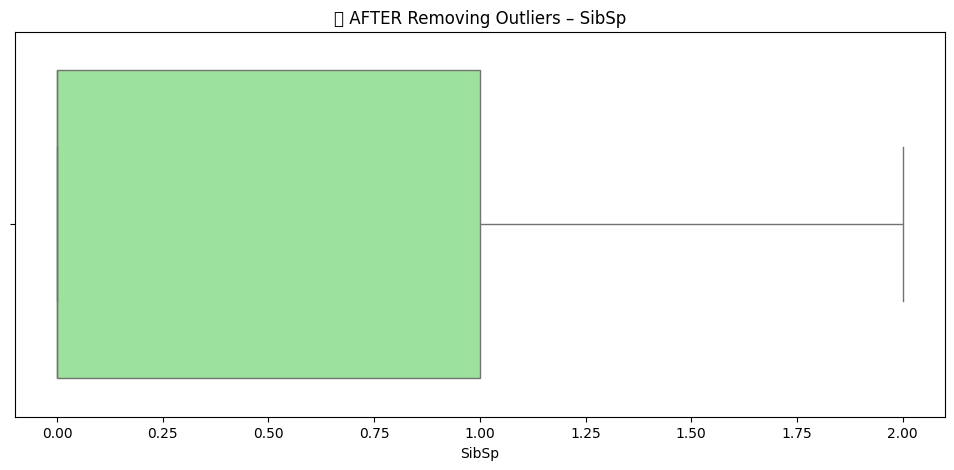

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


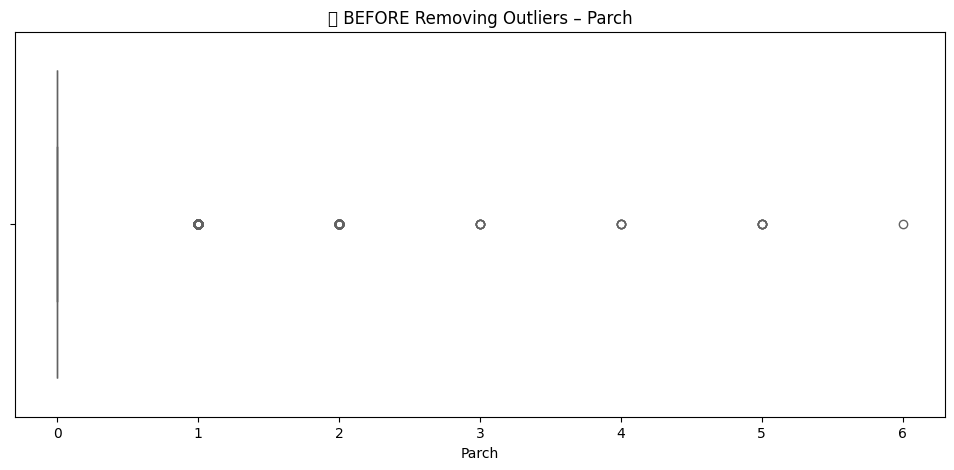

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


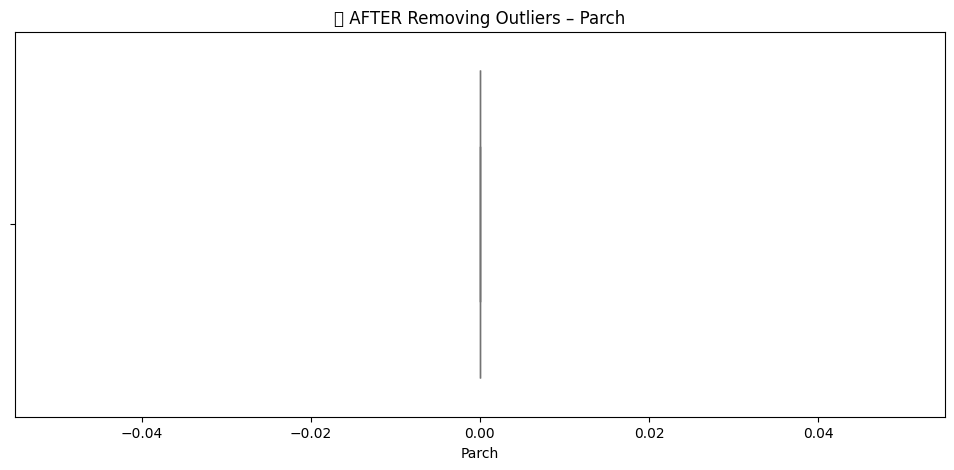

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


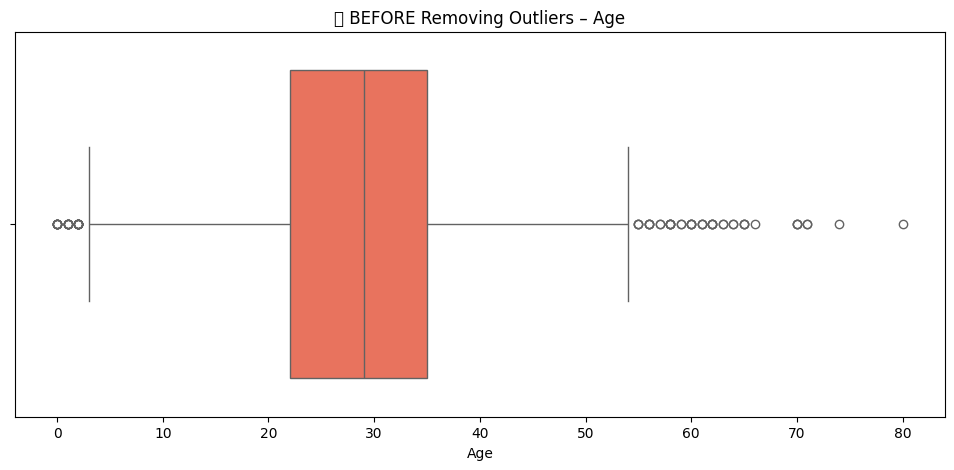

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


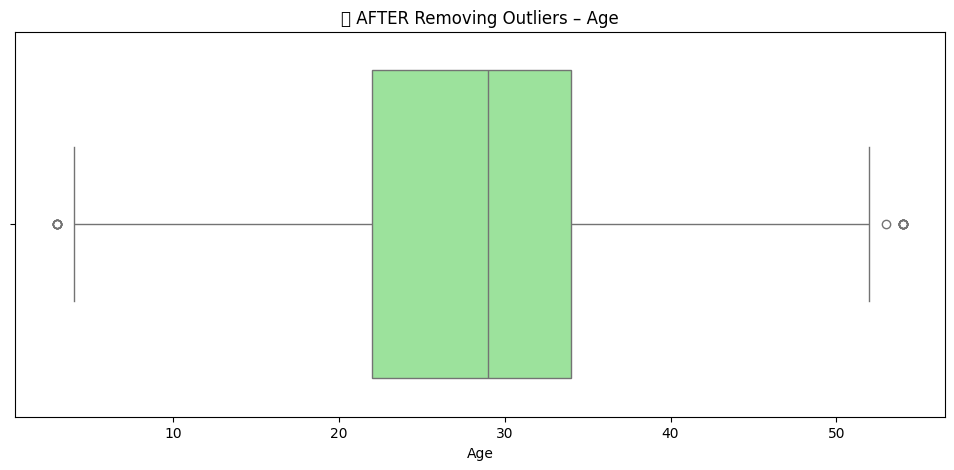

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


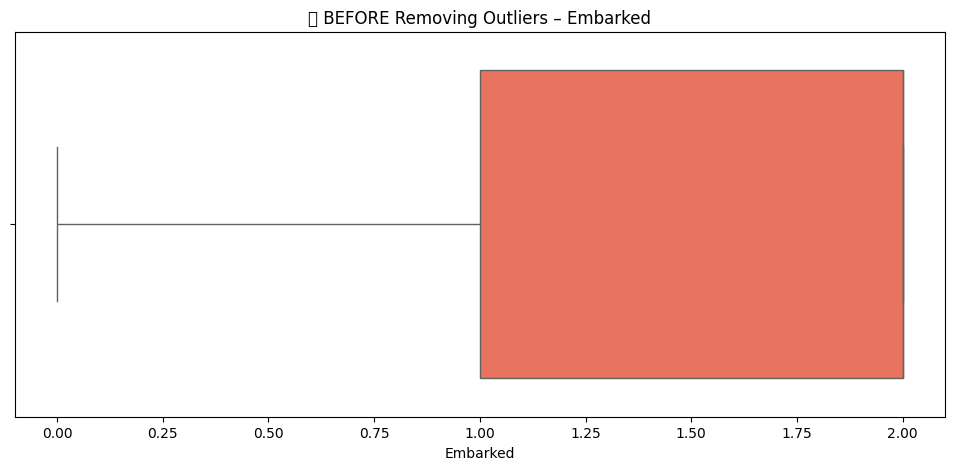

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


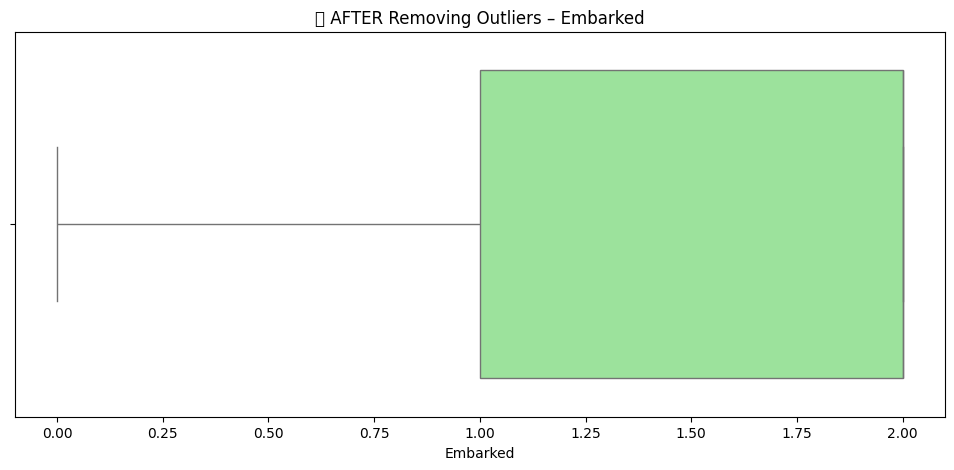

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


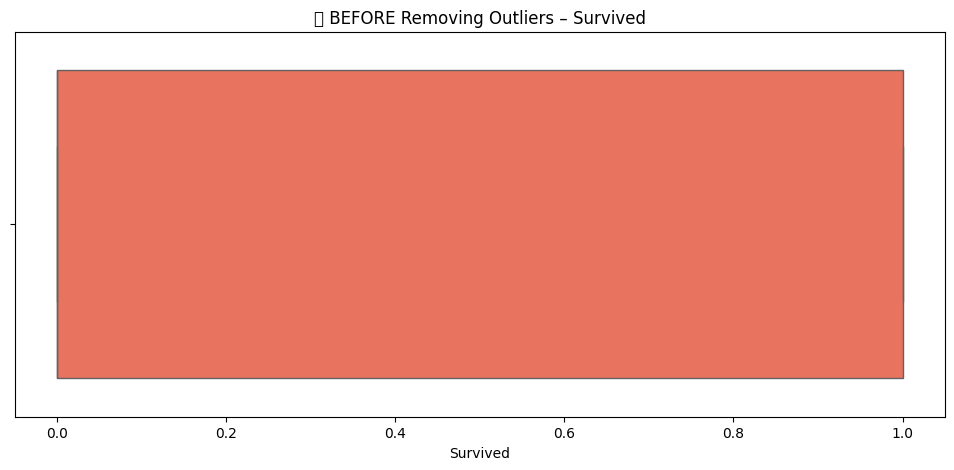

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


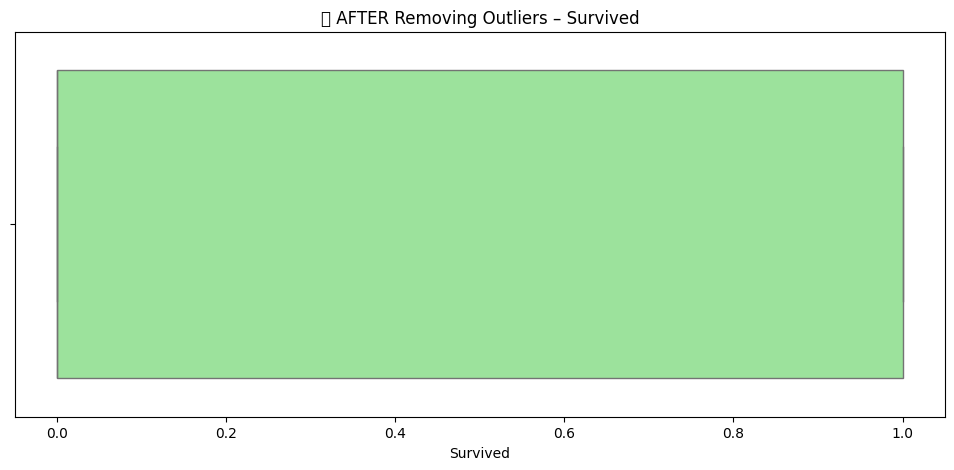

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


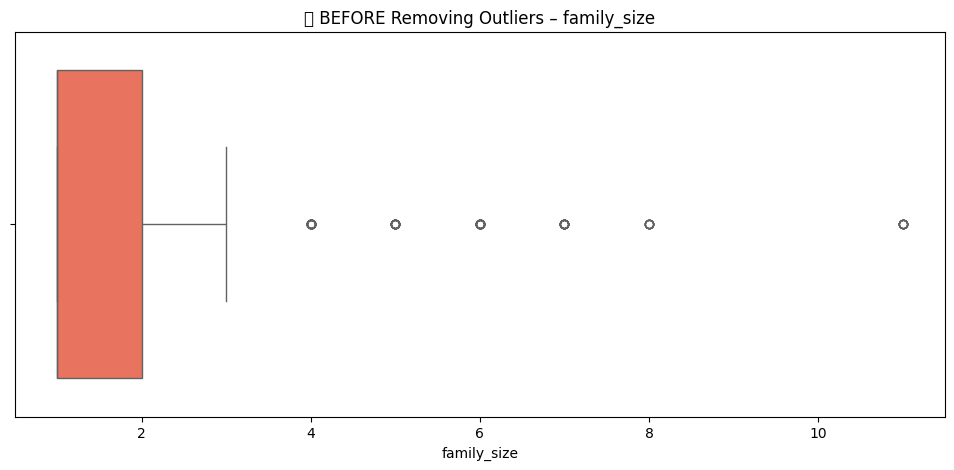

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


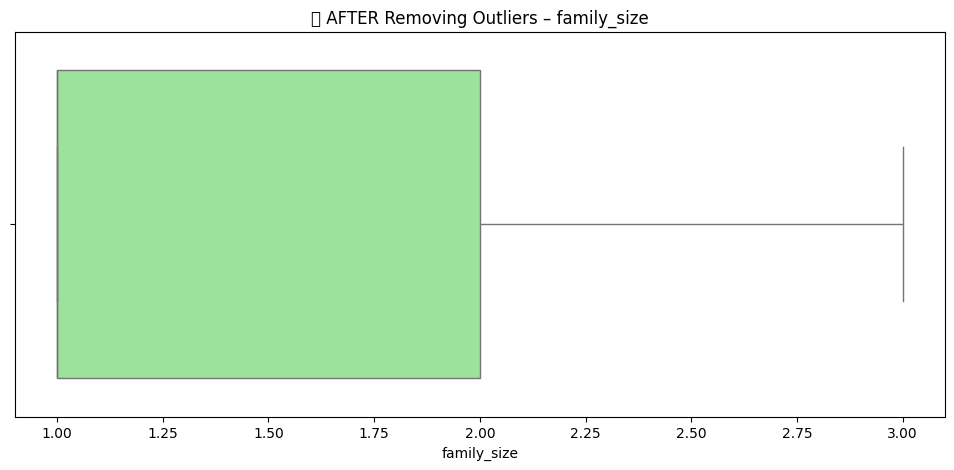

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]


for col in numerical_cols:

    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col], color='tomato')
    plt.title(f'📍 BEFORE Removing Outliers – {col}')
    plt.show()


    cleaned_df = remove_outliers_iqr(df, col)


    plt.figure(figsize=(12, 5))
    sns.boxplot(x=cleaned_df[col], color='lightgreen')
    plt.title(f'✅ AFTER Removing Outliers – {col}')
    plt.show()


<div style="
    border: 4px solid #FFD700;
    background-color: #133960;
    color: white;
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;">
    
 📊 Apply pca+ model_Training +  model_evualation
</div>


In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'family_size', 'Pclass', 'Age_group']
categorical_features = ['Embarked', 'Sex']


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

X = df[numerical_features + categorical_features]
y = df['Survived']

X_processed = preprocessor.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=10)


model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"✅ Accuracy with Feature Engineering + PCA: {accuracy:.2f}")

✅ Accuracy with Feature Engineering + PCA: 0.72


In [ ]:
from  sklearn.model_selection  import  cross_val_score

scores = cross_val_score(model,X_test, y_test,cv=10)

print("Cross-Validation Scores:", scores)
print("Average Accuracy: {:.2f}%".format(scores.mean() * 100))

Cross-Validation Scores: [0.83333333 0.83333333 0.77777778 0.77777778 0.77777778 0.83333333
 0.66666667 0.66666667 0.72222222 0.64705882]
Average Accuracy: 75.36%


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}  # Example for Logistic Regression
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV



param_grid = {

    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']

}


grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)


best_model = grid.best_estimator_


accuracy = best_model.score(X_test, y_test)
print(f"Accuracy of Best Model: {accuracy:.2f}")

Accuracy of Best Model: 0.72


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [ ]:

df['Pclass_Age'] = df['Pclass'] * df['Age']


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}
grid = GridSearchCV(model, param_grid, cv=5)

In [ ]:
df['Pclass_Age'] = df['Pclass'] * df['Age']

In [ ]:

bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60+"]
df['Age_group_alt'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [ ]:
df['Age_group_alt'] = df['Age_group_alt'].map({'0-10': 0, '10-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50-60': 5, '60+': 6})

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV




numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'family_size', 'Pclass', 'Age_group', 'Pclass_Age', 'Age_group_alt']
categorical_features = ['Embarked', 'Sex']



X = df[numerical_features + categorical_features]
y = df['Survived']
X_processed = preprocessor.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)


model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=10)
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy of Best Model: {accuracy:.2f}")

Accuracy: 0.76
Accuracy of Best Model: 0.76


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=10)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy without PCA: {accuracy:.2f}")


Accuracy without PCA: 0.81


In [ ]:
print(X_train)

[[-0.11873566 -0.50286397 -0.4745452  ...  0.          1.
   0.        ]
 [-0.19562045 -0.43700744 -0.4745452  ...  1.          0.
   1.        ]
 [-0.04185087 -0.32425319  0.43279337 ...  1.          0.
   1.        ]
 ...
 [-0.04185087  3.81703316 -0.4745452  ...  1.          1.
   0.        ]
 [-1.34889234 -0.42207354  0.43279337 ...  0.          1.
   0.        ]
 [ 0.49634268 -0.43700744 -0.4745452  ...  1.          1.
   0.        ]]


In [ ]:
print(X_train[0])

[-0.11873566 -0.50286397 -0.4745452  -0.47367361 -0.56097483  0.82737724
  0.33172313  1.          0.          0.          1.          0.        ]


In [ ]:
print( y_test)

590    0
131    0
628    0
195    1
230    1
      ..
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64


In [ ]:

numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'family_size', 'Pclass', 'Age_group', 'Pclass_Age', 'Age_group_alt']
categorical_features = ['Embarked', 'Sex']


Z = [[30, 75.25, 0, 0, 1, 2, 2, 60, 2, 2, 0]]


Z = np.array(Z).reshape(1, -1)


Z_processed = preprocessor.transform(pd.DataFrame(Z, columns=numerical_features + categorical_features))




prediction = model.predict(Z_processed)
print(prediction)

[0]


In [ ]:
import pickle


with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
